In [1]:
import numpy as np
import pandas as pd

In [2]:
# Creating the feature and target variables
celcius=np.array([0,12,44,12,-12,18,67,18,49,67,78,19,93,99,84,72,100],dtype=np.float32)
farenheit=np.array(celcius*1.8+32,dtype=np.float32)

In [3]:
# creating the dataframe
dataset=pd.DataFrame({'celcius':celcius,'farenheit':farenheit})
dataset.head()

,celcius,farenheit
0,0.0,32.000000
1,12.0,53.599998
2,44.0,111.199997
3,12.0,53.599998
4,-12.0,10.400002


In [4]:
dataset.duplicated().sum()

3

In [5]:
dataset.drop_duplicates(inplace=True)

In [6]:
dataset.duplicated().sum()

0

In [8]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [9]:
layer0=tf.keras.layers.Dense(units=1,input_shape=[1]) # specifies single value

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model=tf.keras.Sequential([layer0])

In [11]:
model=tf.keras.Sequential(
    [tf.keras.layers.Dense(units=1,input_shape=[1])]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(learning_rate=0.1))

In [19]:
history=model.fit(dataset.celcius,dataset.farenheit,epochs=500,verbose=False)
print('Finished training the models')

Finished training the models


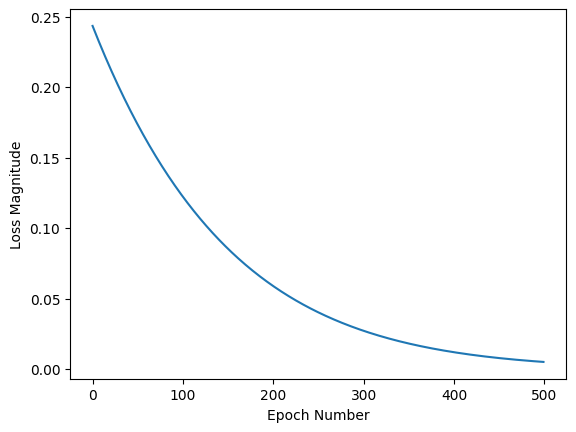

In [21]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(history.history['loss'])

In [37]:
x_new=np.array([int(input("Enter the celcius: "))],dtype=np.float32)
print(f"The Farenheit for {int(x_new)} is {int(model.predict(x_new,verbose=False))}")

Enter the celcius: 0
The Farenheit for 0 is 31


<ipython-input-37-08cc2b8e5465>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"The Farenheit for {int(x_new)} is {int(model.predict(x_new,verbose=False))}")


In [38]:
layer0.get_weights()

[array([[-1.5440526]], dtype=float32), array([0.], dtype=float32)]

Multi layer Preceptron

In [47]:
Layer0=tf.keras.layers.Dense(units=5,input_shape=[1])
Layer1=tf.keras.layers.Dense(units=4)
Layer2=tf.keras.layers.Dense(units=1)

model=tf.keras.Sequential([Layer0,Layer1,Layer2])
model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(dataset.celcius,dataset.farenheit,epochs=500,verbose=False)
print('Finished training the models')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Finished training the models


In [41]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 5)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 119 (480.00 B)

 Trainable params: 39 (156.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 80 (324.00 B)

In [52]:
print(f"The Farenheit for {int(x_new)} is {int(model.predict(x_new))}")
print(f"The weight of layer0 is {Layer0.get_weights()}")
print(f"The weight of layer1 is {Layer1.get_weights()}")
print(f"The weight of layer2 is {Layer2.get_weights()}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
The Farenheit for 0 is 32
The weight of layer0 is [array([[ 0.37138423, -0.9090432 ,  0.11498026, -0.21831733,  0.24737763]],
      dtype=float32), array([ 4.3312173, -4.4324393, -0.8669007, -4.821988 , -2.304587 ],
      dtype=float32)]
The weight of layer1 is [array([[-0.92574185, -0.64522904,  0.21961245,  0.9139698 ],
       [ 0.7097318 ,  0.2653843 , -0.5549051 ,  0.49321124],
       [-0.02342478,  0.32293734, -0.19829756,  1.3098184 ],
       [ 0.6710491 , -0.40160808, -0.74660444,  0.19485521],
       [-0.40014988,  0.24827115, -0.98915887,  0.04040913]],
      dtype=float32), array([-4.1821413, -3.382868 ,  4.378074 , -1.8661923], dtype=float32)]
The weight of layer2 is [array([[-1.0412962 ],
       [-0.5781221 ],
       [ 0.710658  ],
       [-0.08489396]], dtype=float32), array([4.1538973], dtype=float32)]


<ipython-input-52-5e26ba3e56ca>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"The Farenheit for {int(x_new)} is {int(model.predict(x_new))}")
